# **Reto**

In [1]:
# Importamos librerías de manejo numérico y procesamiento de datos.
import numpy as np
import pandas as pd

# Importamos scikit-learn, nuestra librería base para utilizar algoritmos de machine learning.
import sklearn

#Importamos los datasets de scikit-learn
from sklearn import datasets

# Importamos librerías de scikit-learn para manejo de regresión lineal/logística.
from sklearn import linear_model

# Importamos librerías de scikit-learn para uso de clasificación de bosque aleatorio.
from sklearn.ensemble import RandomForestClassifier

# Importamos librerías de scikit-learn para clusterización con k-means
from sklearn.cluster import KMeans

# Importamos librerías para manejo del rendimiento (performance) de nuestros modelos.
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Importamos librerías para graficar.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos el tamaño del graficado (opcional).
plt.rcParams['font.size']=15

In [2]:
# Carga del Iris dataset.
iris = datasets.load_iris()

# Imprimimos los datos.
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
# Creamos el DataFrame con los feature names.
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Creamos el DataFrame con los targets (las especies de la flor).
target = pd.DataFrame(data=iris.target, columns=['species'])

# Unimos ambos DF con concat; agregamos una nueva columna.
data = pd.concat([data, target], axis=1)

# Mezclar en orden aleatorio.
data = data.sample(frac=1, random_state=1234)

# Imprimimos los primeros registros del nuevo DataFrame.
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


## **1. Crear el DataFrame con los feature names**

- ``iris.data`` contiene las características numéricas de las flores (como el largo y ancho de los pétalos y sépalos).

- ``iris.feature_names`` son los nombres de las columnas, que describen cada característica.

- ``pd.DataFrame(...) ``convierte estos datos en un DataFrame de pandas, lo que facilita su manipulación y análisis.

Ejemplo de salida ``(data.head())``:

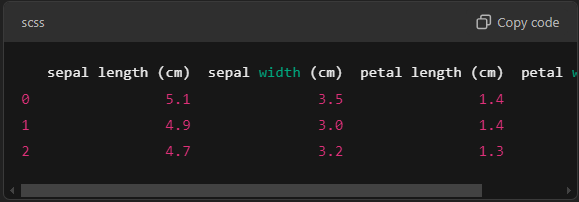

## **2. Crear el DataFrame con los targets**

``target = pd.DataFrame(data=iris.target, columns=['species'])``

- ``iris.target`` contiene los valores de las especies (0, 1 o 2, que representan las diferentes especies de Iris).

- Se convierte en un DataFrame de pandas con una sola columna llamada ``'species'``.

Ejemplo de salida ``(target.head())``:

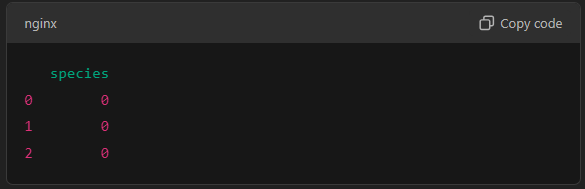

## **3. Unir los DataFrames con concat**

``data = pd.concat([data, target], axis=1)``
- ``pd.concat([...], axis=1)`` concatena los DataFrames por columnas.

- Ahora ``data`` tiene tanto las características como la columna ``'species'``.

Ejemplo ``(data.head())``:

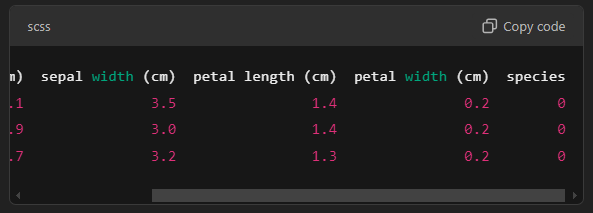

## **4. Mezclar en orden aleatorio**

``data = data.sample(frac=1, random_state=1234)``

- ``sample(frac=1)`` toma el 100% de las filas pero en orden aleatorio.

- ``random_state=1234`` asegura que los resultados sean reproducibles cada vez que se ejecute el código.

- `data.head()` Muestra las primeras 5 filas del nuevo DataFrame mezclado

## **En resumen:**
1. Se crea un DataFrame con las características ``(data)``.

2. Se crea otro DataFrame con las especies ``(target)``.

3. Se combinan ambos DataFrames ``(data = pd.concat(...))``.

4. Se mezcla el DataFrame aleatoriamente ``(sample(frac=1))``.

5. Se muestran los primeros registros ``(data.head())``.

In [4]:
# Fracción de entrenamiento 0.8.
Ntrain = int(data.shape[0] * 0.8)

# Datos de entrenamiento.
train = data.iloc[:Ntrain, :]

# Datos de prueba.
test = data.iloc[Ntrain:, :]

## **1. Definir el tamaño del conjunto de entrenamiento**

``Ntrain = int(data.shape[0] * 0.8)``

- ``data.shape[0]`` obtiene el número total de filas en ``data`` (es decir, la cantidad de muestras en el dataset).

- Se multiplica por ``0.8`` para obtener el 80% de los datos para entrenamiento.

- ``int(...)`` convierte el resultado en un número entero, ya que el índice de filas debe ser un valor entero.

🔹 Ejemplo:     
Si ``data.shape[0] = 150`` (porque el dataset de Iris tiene 150 muestras), entonces:

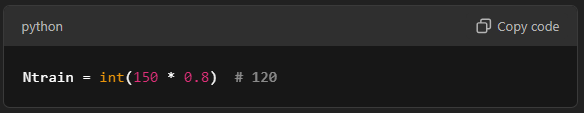

Esto significa que **las primeras 120 filas** se usarán para entrenamiento y las **30 restantes para prueba**.

## **2. Extraer datos de entrenamiento**

``train = data.iloc[:Ntrain, :]``
- ``iloc[:Ntrain, :]`` selecciona las primeras ``Ntrain`` filas de ``data``.

- ``:`` en la segunda posición significa "tomar todas las columnas".

🔹 Ejemplo:
Si ``Ntrain = 120``, entonces ``train`` contendrá las filas **0 a 119** del DataFrame.

## **3. Extraer datos de prueba**

``test = data.iloc[Ntrain:, :]``
- ``iloc[Ntrain:, :]`` selecciona desde ``Ntrain`` hasta el final del DataFrame.

- Esto toma **el 20% restante** de los datos.

🔹 Ejemplo:    
Si ``Ntrain = 120``, entonces ``test`` contendrá **las filas 120 a 149** del DataFrame.

## **🔹 Resumen del código:**
1. Se calcula cuántas filas (80%) se usarán para entrenamiento.

2. Se dividen los datos en ``train`` (las primeras ``Ntrain`` filas) y ``test`` (el resto).

3. ``train`` y ``test`` ahora contienen conjuntos separados para entrenar y evaluar un modelo.

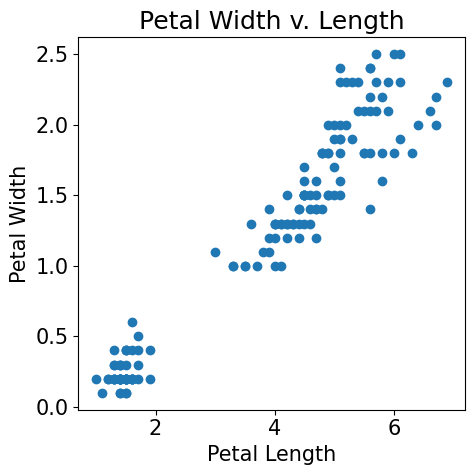

In [5]:
# Definimos variables para acceder de forma más simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Creamos la gráfica comparanco Petal lenght (eje x) contra Petal width (eje y)
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width v. Length")
f.tight_layout()

## **1. Definir variables para acceder a columnas específicas**

``plength = data["petal length (cm)"]``     
``pwidth = data["petal width (cm)"]``

- Se extraen dos columnas del DataFrame ``data``:

  - ``plength`` almacena los valores de la columna **"petal length (cm)"**.

  - ``pwidth`` almacena los valores de la columna **"petal width (cm)"**.

- Esto facilita su uso en la gráfica, evitando escribir ``data["petal length (cm)"]`` cada vez.

## **2. Crear la figura y los ejes para la gráfica**

``f = plt.figure(figsize=(5,5))``     
``ax = f.add_subplot(1,1,1)``
- ``plt.figure(figsize=(5,5))`` crea una nueva figura de 5x5 pulgadas.

- ``add_subplot(1,1,1)`` agrega un único gráfico (1 fila, 1 columna, primer gráfico).

**📌 Ejemplo visual** de cómo dividir gráficos con a``dd_subplot(rows, cols, index)``:

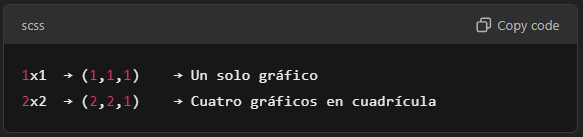

Aquí solo hay uno, así que no es necesario dividir.

## **3. Dibujar el gráfico de dispersión**

``ax.scatter(plength, pwidth)``
- ``scatter(x, y)`` crea un **diagrama de dispersión**.

- En este caso, ``plength`` (eje X) se grafica contra ``pwidth`` (eje Y).

- Cada punto representa una flor en función del largo y ancho de su pétalo.

## **4. Etiquetas y título**

``ax.set_xlabel("Petal Length")``    
``ax.set_ylabel("Petal Width")``    
``ax.set_title("Petal Width v. Length")``     
- ``set_xlabel("Petal Length")`` etiqueta el eje X.

- ``set_ylabel("Petal Width")`` etiqueta el eje Y.

- ``set_title("Petal Width v. Length")`` le da un título al gráfico.

## **5. Ajustar el diseño del gráfico**

``f.tight_layout()``
- ``tight_layout()`` **ajusta automáticamente** los márgenes para evitar que las etiquetas o títulos se sobrepongan.

## **🔹 Resumen del código:**
✅ Extrae las columnas Petal Length y Petal Width.   
✅ Crea una figura y un gráfico de dispersión.     
✅ Añade etiquetas y título.    
✅ Ajusta la distribución del gráfico.   

In [6]:
# Importar un objeto de regresión lineal de sklearn.
model_1 = linear_model.LinearRegression()

# Ajustar el modelo a tus datos.
model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])

# Imprimir los coeficientes.
print("Coef\n", model_1.coef_)

# Imprimir el sesgo o bias.
print("\n\nBias\n", model_1.intercept_)

Coef
 [0.41490802]


Bias
 -0.357589314248546


## **1️⃣ Importar el modelo de regresión lineal**

``model_1 = linear_model.LinearRegression()``
- Se **crea un objeto** de regresión lineal usando ``LinearRegression() de sklearn.linear_model``.

- Este modelo buscará **ajustar una línea recta** a los datos para hacer predicciones.

## **2️⃣ Entrenar el modelo con los datos de entrenamiento**

``model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])``
- ``train.iloc[:, 2]``: Toma la **tercera columna** de ``train`` (índice ``2``).

- ``train.iloc[:, 3]``: Toma la **cuarta columna** de ``train`` (índice ``3``).

- ``pd.DataFrame(...)``: Convierte ``train.iloc[:, 2]`` en un DataFrame, porque ``sklearn`` requiere que las **features** sean en formato de 2D (matriz de características).

**🔹 Ejemplo:**     
Si ``train.iloc[:, 2]`` representa **"Petal Length"** y ``train.iloc[:, 3]`` representa **"Petal Width"**, entonces estamos ajustando un modelo que predice el **ancho del pétalo** a partir de **su largo**.

## **3️⃣ Imprimir los coeficientes del modelo**

``print("Coef\n", model_1.coef_)``
- ``model_1.coef_`` devuelve los **coeficientes (pendientes)** del modelo.

- En una regresión lineal de la forma:

$$Y = mx+b$$

``coef_`` es el valor de ``m`` **(pendiente de la recta)**.

**🔹 Ejemplo de salida:**

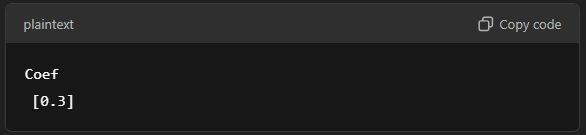

Esto significa que por **cada unidad que aumenta "Petal Length"**, el **"Petal Width"** aumenta en ``0.3``.



## **4️⃣ Imprimir el sesgo (bias/intercepto)**

``print("\n\nBias\n", model_1.intercept_)``
- ``model_1.intercept_`` es el **término independiente** ``b`` en la ecuación de la recta:

$$y=mx+b$$

- Representa **dónde la línea cruza el eje Y** cuando ``x = 0``.

**🔹 Ejemplo de salida:**

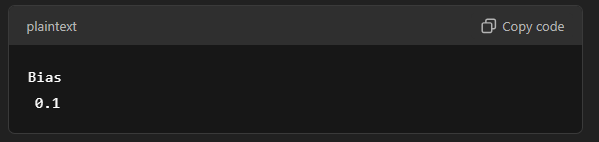

Esto significa que si ``Petal Length = 0``, entonces el **Petal Width** predicho sería ``0.1``.

## **🔹 Resumen del código:**
✅ Crea un modelo de regresión lineal.     
✅ Entrena el modelo con **Petal Length** como entrada y **Petal Width** como salida.      
✅ Muestra el coeficiente (``m``) y el bias (``b``).    

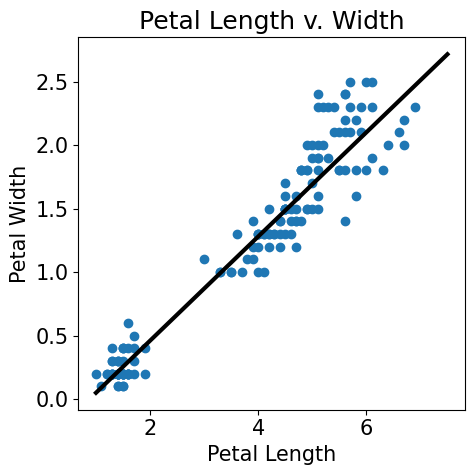

In [10]:
# Definimos variables para acceder de forma más simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Definimos un arreglo desde el valor mímimo del petal length hasta el máximo del petal lenght + 1, en pasos de 0.5.
xvals = np.arange(plength.min(), plength.max()+1, 0.5)

# Ecuación de nuestra regresión lineal.
yvals = 0.41*xvals - 0.36

# Gráficamos nuestra recta con los datos y nuestra ecuación.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()

## **1️⃣ Extraer columnas del DataFrame**

``plength = data["petal length (cm)"]``    
``pwidth = data["petal width (cm)"]``    
- Se extraen las columnas **"Petal Length"** y **"Petal Width"** del DataFrame ``data``, lo que simplifica su uso en la gráfica.

## **2️⃣ Generar un rango de valores para la predicción**

``xvals = np.arange(plength.min(), plength.max()+1, 0.5)``
- ``plength.min()`` → Valor mínimo de **"Petal Length"**.

- ``plength.max()+1`` → Valor máximo + 1 (para extender un poco el rango).

- ``0.5`` → Incremento entre valores (se generan puntos cada 0.5 unidades).

- **Objetivo**: Crear valores de entrada ``x`` para graficar la línea de regresión.

🔹 **Ejemplo de salida** (``xvals``) si el mínimo es 1 y el máximo es 6:

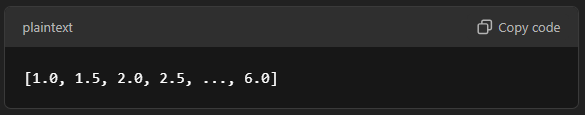

## **3️⃣ Definir la ecuación de la regresión lineal**

``yvals = 0.41*xvals - 0.36``
- Se usa la ecuación de la recta:

$$ y=mx+b$$
donde:

- ``m = 0.41`` (pendiente de la recta).

- ``b = -0.36`` (intercepto o bias).

- Esto genera valores ``yvals`` correspondientes a cada ``xvals``.

🔹 Ejemplo de cálculo para ``x = 1.5``:

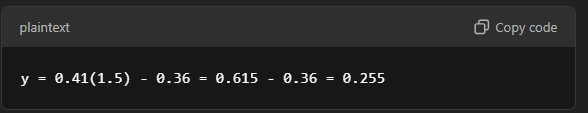


## **4️⃣ Graficar la regresión junto con los datos originales**
```python
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
# Gráfico de dispersión
ax.scatter(plength, pwidth)
# Línea de regresión en negro ('k'), grosor 3  
ax.plot(xvals, yvals, 'k', linewidth=3)  
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()
```

- ``ax.scatter(plength, pwidth)``: Grafica los puntos de datos originales.

- ``ax.plot(xvals, yvals, 'k', linewidth=3)``:

  - ``xvals`` → Valores en **X**.

  - ``yvals`` → Valores en **Y** (predichos con la regresión).

  - ``'k'`` → Color negro.

  - ``linewidth=3`` → Grosor de la línea.

#### **🔹 Visualización esperada:** 

**📌 Puntos dispersos** → Representan los datos originales.     
**📌 Línea recta negra** → Muestra la predicción de la regresión.

## **🔹 Resumen del código:**
✅ Extrae los datos de **"Petal Length"** y **"Petal Width"**.    
✅ Crea valores ``xvals`` en un rango para la predicción.     
✅ Define ``yvals`` con la ecuación de la regresión.       
✅ Grafica los puntos originales y la línea de regresión. 